##  Highlights of the project
- Objective - To make a deep learning model to detect an image having digit between 0-9
- Dataset used -  MNIST dataset  
- ML library - TensorFlow 

### Importing libraries

In [47]:
import tensorflow as tf
import matplotlib.pyplot as plt

### Loading dataset

In [48]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("C:\\Users\\Rahul\\Desktop\\Mail\\Data_MNIST", one_hot=True)

Extracting C:\Users\Rahul\Desktop\Mail\Data_MNIST\train-images-idx3-ubyte.gz
Extracting C:\Users\Rahul\Desktop\Mail\Data_MNIST\train-labels-idx1-ubyte.gz
Extracting C:\Users\Rahul\Desktop\Mail\Data_MNIST\t10k-images-idx3-ubyte.gz
Extracting C:\Users\Rahul\Desktop\Mail\Data_MNIST\t10k-labels-idx1-ubyte.gz


In [49]:
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

### Shape/Dimensions of train & test datasets

In [50]:
print("Shape of training features datset : " + str(X_train.shape))
print("Shape of training labels datset : " + str(Y_train.shape))
print("Shape of test features datset : " + str(X_test.shape))
print("Shape of test features datset : " + str(Y_test.shape))

Shape of training features datset : (55000, 784)
Shape of training labels datset : (55000, 10)
Shape of test features datset : (10000, 784)
Shape of test features datset : (10000, 10)


### Observations after loading the dataset

- Dataset is already flattended
- 55000 training examples
- Image is $28\times28$ pixel ($784 = 28\times28$) 
- 10000 testing exmaples

### Plotting the image

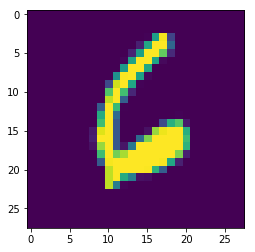

In [54]:
# Change the value of index to plot the respective training example
index=3
plt.imshow(X_train[index,:].reshape(28,28))

### Normalizing the dataset

In [143]:
X_train = X_train/255
Y_train = Y_train/255
X_test = X_test/255
Y_test = Y_test/255

### Start of Computational TF graph

In [149]:
# Create placeholders for X(features) and Y(labels)
x = tf.placeholder(tf.float32,shape=(None,784))
y = tf.placeholder(tf.float32,shape=(None,10))

# Defining & initializing the weights and bias
w = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

# Calculating the logit (xw+b)
z = tf.add(tf.matmul(x,w),b)

# Passing logit through activation function (softmax is used here)
yhat = tf.nn.softmax(z)

# Calculating the cost (cross entropy is used here)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=z,labels=y)

# Backward propagation using Gradient Descent
training_the_model = tf.train.AdadeltaOptimizer(learning_rate=0.7).minimize(cross_entropy)

# Starting the TF session
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Making small batches for 100 examples and iterating 1000 times 
for _ in range(1900):
    batch_xs, batch_ys = mnist.train.next_batch(300)
    sess.run(training_the_model, feed_dict={x: batch_xs, y: batch_ys})
    
# Calculating the accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(yhat,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Passing test dataset and calculating the accuracy
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

sess.close()

0.9136
